# **EXPERIMENT 7**

# **QUESTION 1 - CNN**

In [92]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 

In [93]:
inChans = 3
outChans = 15
krnSize = 5 #change here
stride = 1 #change here
padding = 0 #change here



```
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 

inChans = 5  # Increase the number of input channels
outChans = 10  # Decrease the number of output channels
krnSize = 3  # Use a smaller kernel size
stride = 2  # Increase the stride
padding = 1  # Add some padding

c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)
print(c)
```



In [94]:
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)
print(c) 
print(' ')

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 


In [95]:
print('Size of weight ' + str(c.weight.shape))
print('Size of bias ' + str(c.bias.shape))


Size of weight torch.Size([15, 3, 5, 5])
Size of bias torch.Size([15])


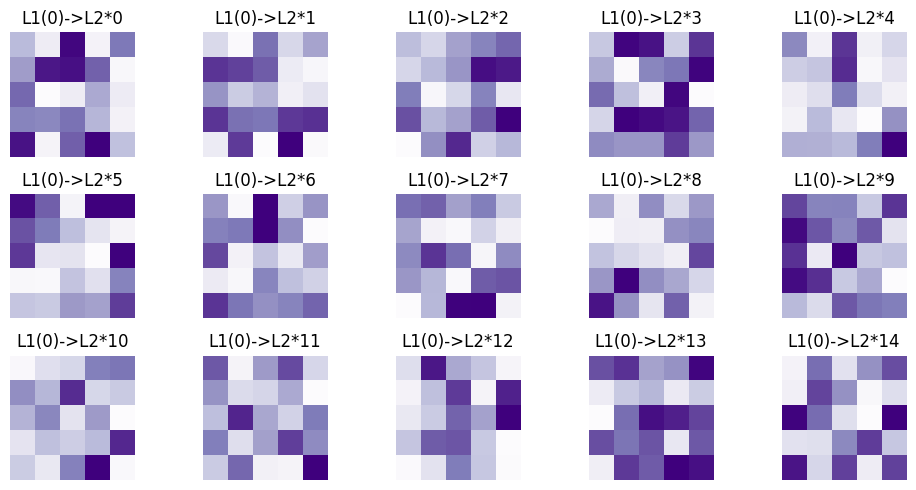

In [96]:
fig, axs = plt.subplots(3,5, figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(), cmap = 'Purples')
  ax.set_title('L1(0)->L2*%s'%i)
  ax.axis('off')
plt.tight_layout()
plt.show()


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)
torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


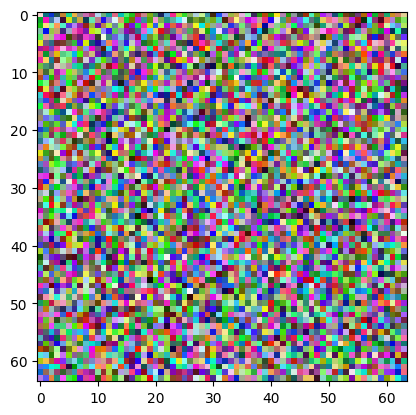

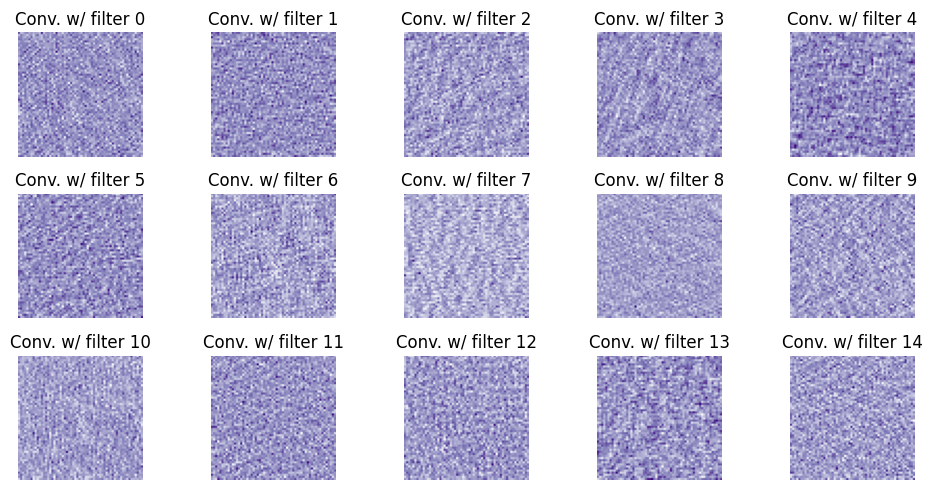

In [97]:
imsize = (1,3,64, 64)
img = torch.rand(imsize)
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)
plt.imshow(np.squeeze(img2view));
convRes = c(img)
print(img.shape)
print(convRes.shape)
fig,axs = plt.subplots(3,5,figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
  I = torch.squeeze(convRes[0,i,:,:]).detach()
  ax.imshow(I, cmap = 'Purples')
  ax.set_title('Conv. w/ filter %s' %i)
  ax.axis('off')
plt.tight_layout()
plt.show()

# **Q2 Fashion MNIST**

In [98]:
!pip install -q tensorflow-gpu==2.0.0-beta1
try: 
  %tensorflow_version 2.x 
except Exception: 
    pass
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [100]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)


x_train.shape: (60000, 28, 28)


In [101]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


(60000, 28, 28, 1)


In [102]:
K = len(set(y_train))
print("number of classes", K)

number of classes 10


In [103]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)



```
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='tanh')(i)
x = Conv2D(64, (3,3), strides=2, activation='tanh')(x)
x = Conv2D(128, (3,3), strides=2, activation='tanh')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

Here's an example of how you can change the activation function in the Conv2D layers to Tanh:
```



In [104]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 27.6101 - accuracy: 0.1041 - val_loss: 27.6100 - val_accuracy: 0.1009
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 27.6101 - accuracy: 0.1013 - val_loss: 27.6100 - val_accuracy: 0.1007
Epoch 3/15
 360/1875 [====>.........................] - ETA: 21s - loss: 27.4509 - accuracy: 0.0993

KeyboardInterrupt: ignored



```
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

```



In [ ]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap= cmap) 
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat 
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));